### Handling Missing Values

In any real world dataset there are always few null values. It doesn’t really matter whether it is a regression,classfication or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Avoid Warning
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
# Separate Independent and Dependent variables
X = dataset.iloc[:, :-1] 
y = dataset.iloc[:, 3] 

In [5]:
# Return number of missing values in each column
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

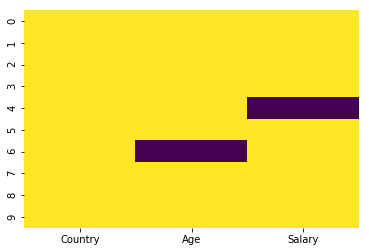

In [6]:
# Visualize Missing values
sns.heatmap(X.isnull(),cbar=False,cmap='viridis_r')

### Imputation

Imputation is simply the process of substituting the missing values of our dataset.We can do this by defining our own customised function or we can simply perform imputation by using the Imputer class provided by sklearn.

In [7]:
# Taking care of missing data
from sklearn.preprocessing import Imputer

# Initialize the object
imputer = Imputer(missing_values='NaN',strategy='mean',axis = 0) # Column wise mean

C:\Users\Khaleel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Since the `median /mean` can only be computed on numerical attributes, we need to create a copy of the data
without the text attribute:

In [8]:
# Replacing with missing value columns with corresponding mean values
X.iloc[:,1:3] = imputer.fit_transform(X.iloc[:,1:3])

In [9]:
X

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [10]:
ser = pd.Series(['a', 'b', np.NaN,'d'])

In [11]:
ser.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [12]:
ser.value_counts()

a    1
d    1
b    1
dtype: int64

## Handling Categorical Missing Values

In [13]:
df = pd.DataFrame([["a", "x"], [np.nan, "y"],
                    ["a", np.nan],["b", "y"]], dtype="category")

In [14]:
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [15]:
from sklearn import impute

In [16]:
method = impute.SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [17]:
df = method.fit_transform(df)

In [18]:
df

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

In [19]:
df

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

In [26]:
dd = dataset[['Country','Age']]
dd

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [29]:
di = dict(dd.drop_duplicates('Country').values)

In [30]:
di.items

{'France': 44.0, 'Spain': 27.0, 'Germany': 30.0}

In [33]:
for i,j in di.items():
    

France 44.0
Spain 27.0
Germany 30.0


In [36]:
dataset.isnull().any()

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

In [52]:
dataset.groupby(by='Country')['Age'].transform(lambda x : x.fillna(x.value_counts().index[0]))

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    38.0
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

In [59]:
dataset.groupby(by='Country')['Age'].value_counts().index[0]

('France', 35.0)